In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

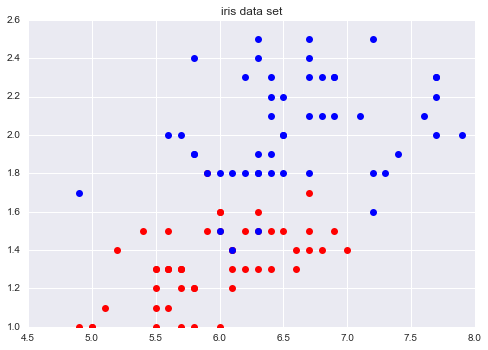

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
import seaborn
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[50:, [0,3]]  # we only take the first two features.
Y = iris.target
y=Y[:100]
value=np.unique(y)
c=['ro','bo']
for i in range(2):
    index=y==value[i]
    plt.plot(X[index, 0], X[index, 1], c[i])
    plt.title('iris data set')
plt.show()
y

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))
    

In [16]:
n_input=2
n_hidden=6
n_output=2

w1=np.random.rand(n_input+1,n_hidden)
w2=np.random.rand(n_hidden+1,n_output)
epsilon=0.01
Xnew=np.c_[np.ones(len(X)),X]


In [20]:

epsilon=0.01
nn_input=2
nn_hidden_1=50
nn_hidden_2=3
nn_output=2
W1=np.random.rand(nn_input+1,nn_hidden_1)
W2=np.random.rand(nn_hidden_1+1,nn_output)
one=np.ones(len(X))
Xnew=np.c_[one,X]
for i in range(100000):
    a1=np.dot(Xnew,W1)
    z1=sigmoid(a1)
   
    z1=np.c_[one,z1]
    a2=np.dot(z1,W2)
    
    #softmax
    z2=np.exp(a2)
    total=(z2[:,0]+z2[:,1])
    z2=zip(z2[:,0]/total,z2[:,1]/total)
    z2=np.array(z2)
    loss= np.sum(-np.log((z2[range(len(X)),y])))
    if loss and i%10000==0:
        print 'iteration %i: %f' %(i,loss)
    
    #backProp
    
    delta2=z2
    delta2[range(len(X)),y]=delta2[range(len(X)),y]-1
    dW2=np.dot(z1.T,delta2)
    
    delta1=np.dot(delta2,W2.T)
    delta1=delta1[:,1:]*d_sigmoid(a1)
    
    dW1=np.dot(Xnew.T,delta1)
    
    W1+=-epsilon*dW1
    W2+=-epsilon*dW2

iteration 0: 77.524396
iteration 10000: 17.171751
iteration 20000: 16.406635
iteration 30000: 15.278537
iteration 40000: 14.095384
iteration 50000: 13.252901
iteration 60000: 12.714679
iteration 70000: 12.318350
iteration 80000: 12.041318
iteration 90000: 11.848255


In [21]:
def prediction(W1,W2,X):
    Xnew=np.r_[1,X]
    a1=np.dot(Xnew,W1)
    z1=sigmoid(a1)
    z1=np.r_[1,z1]
    a2=np.dot(z1,W2)
    #softmax
    z2=np.exp(a2)
    return z2,np.argmax(z2)

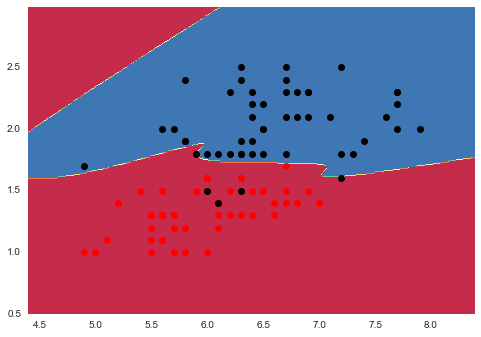

In [22]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = (np.c_[xx.ravel(), yy.ravel()])
m=Z.shape[0]
labels=[]
for i in range(m):
    [x,myvalue]=prediction(W1,W2,Z[i])
    if myvalue==1:
        label=1
    elif myvalue==0:
        label=0
    labels.append(label)
    
labels=np.array(labels)
labels=labels.reshape(xx.shape)
plt.contourf(xx, yy, labels, cmap=plt.cm.Spectral)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
uniq=np.unique(y)
color=['ro','ko']
for i in range(2):
    index=y==uniq[i]
    plt.plot(X[index,0],X[index,1],color[i])
plt.show()